C:\Users\manal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


=== SMOTE + Random Forest ===
              precision    recall  f1-score   support

        ENFJ       0.67      0.29      0.41        48
        ENFP       0.66      0.64      0.65       169
        ENTJ       0.68      0.29      0.41        58
        ENTP       0.59      0.56      0.58       171
        ESFJ       0.00      0.00      0.00        10
        ESFP       0.00      0.00      0.00        12
        ESTJ       0.00      0.00      0.00        10
        ESTP       0.50      0.18      0.27        22
        INFJ       0.62      0.69      0.65       368
        INFP       0.59      0.79      0.68       458
        INTJ       0.64      0.58      0.60       273
        INTP       0.66      0.75      0.70       326
        ISFJ       0.63      0.41      0.50        41
        ISFP       0.59      0.35      0.44        68
        ISTJ       0.76      0.25      0.38        51
        ISTP       0.73      0.52      0.61        84

    accuracy                           0.63      2

C:\Users\manal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

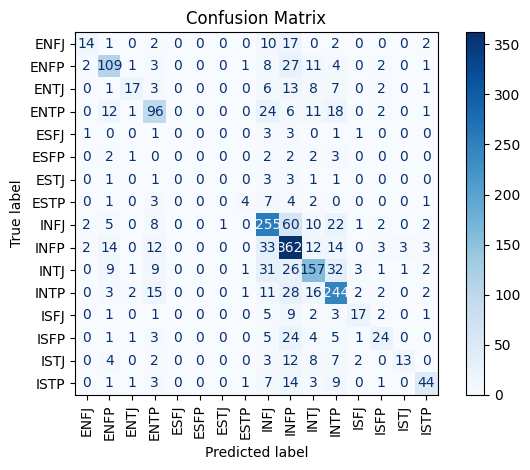

'\n# === 5. STRATEGY 2: Random Undersampling ===\ndef run_undersample():\n    rus = RandomUnderSampler(random_state=42)\n    X_res, y_res = rus.fit_resample(X_train_tfidf, y_train)\n    clf = RandomForestClassifier(random_state=42)\n    clf.fit(X_res, y_res)\n    preds = clf.predict(X_test_tfidf)\n    print("=== UNDERSAMPLING ===")\n    print(classification_report(y_test, preds))\n\n# === 6. STRATEGY 3: Class Weights ===\ndef run_class_weight():\n    clf = LogisticRegression(class_weight=\'balanced\', max_iter=1000)\n    clf.fit(X_train_tfidf, y_train)\n    preds = clf.predict(X_test_tfidf)\n    print("=== CLASS WEIGHT ===")\n    print(classification_report(y_test, preds))\n'

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv("mbti_1.csv")
X = df['posts']
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

def run_smote():
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train_tfidf, y_train)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_res, y_res)
    preds = clf.predict(X_test_tfidf)
    print("=== SMOTE ===")
    print(classification_report(y_test, preds))
    print(plot_confusion(y_test, preds))

def plot_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=sorted(y.unique()))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
    disp.plot(xticks_rotation=90, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

def run_smote_rf():
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train_tfidf, y_train)
    clf = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)
    clf.fit(X_res, y_res)
    preds = clf.predict(X_test_tfidf)
    print("=== SMOTE + Random Forest ===")
    print(classification_report(y_test, preds))
    plot_confusion(y_test, preds)

run_smote_rf()



"""
# === 5. STRATEGY 2: Random Undersampling ===
def run_undersample():
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X_train_tfidf, y_train)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_res, y_res)
    preds = clf.predict(X_test_tfidf)
    print("=== UNDERSAMPLING ===")
    print(classification_report(y_test, preds))

# === 6. STRATEGY 3: Class Weights ===
def run_class_weight():
    clf = LogisticRegression(class_weight='balanced', max_iter=1000)
    clf.fit(X_train_tfidf, y_train)
    preds = clf.predict(X_test_tfidf)
    print("=== CLASS WEIGHT ===")
    print(classification_report(y_test, preds))
"""

In [42]:
run_undersample()

C:\Users\manal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\manal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\manal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


=== UNDERSAMPLING ===
              precision    recall  f1-score   support

        ENFJ       0.17      0.60      0.26        48
        ENFP       0.46      0.52      0.49       169
        ENTJ       0.22      0.55      0.31        58
        ENTP       0.44      0.42      0.43       171
        ESFJ       0.09      0.50      0.16        10
        ESFP       0.03      0.17      0.05        12
        ESTJ       0.08      0.60      0.13        10
        ESTP       0.24      0.73      0.36        22
        INFJ       0.51      0.32      0.39       368
        INFP       0.62      0.32      0.42       458
        INTJ       0.51      0.33      0.40       273
        INTP       0.56      0.33      0.41       326
        ISFJ       0.21      0.66      0.32        41
        ISFP       0.23      0.29      0.26        68
        ISTJ       0.30      0.51      0.38        51
        ISTP       0.46      0.55      0.50        84

    accuracy                           0.38      2169
   m

In [43]:
run_class_weight()

=== CLASS WEIGHT ===
              precision    recall  f1-score   support

        ENFJ       0.39      0.60      0.48        48
        ENFP       0.63      0.59      0.61       169
        ENTJ       0.34      0.59      0.43        58
        ENTP       0.64      0.57      0.60       171
        ESFJ       0.19      0.40      0.26        10
        ESFP       0.03      0.08      0.04        12
        ESTJ       0.19      0.50      0.28        10
        ESTP       0.29      0.68      0.41        22
        INFJ       0.79      0.58      0.67       368
        INFP       0.76      0.65      0.70       458
        INTJ       0.69      0.56      0.62       273
        INTP       0.77      0.73      0.75       326
        ISFJ       0.42      0.68      0.52        41
        ISFP       0.40      0.54      0.46        68
        ISTJ       0.39      0.65      0.49        51
        ISTP       0.53      0.69      0.60        84

    accuracy                           0.62      2169
   ma